In [75]:
import pandas as pd
import numpy as np
df = pd.read_csv('nhatot_crawl4ai.csv')
print(f"Số dòng ban đầu: {len(df)}")
# Bước 1: Loại bỏ các hàng mà tất cả các cột đều trống (toàn bộ là NaN)
df_cleaned = df.dropna(how='all')
print(f"Số dòng sau khi loại bỏ hàng trống hoàn toàn: {len(df_cleaned)}")
# Bước 2: Loại bỏ các hàng có quá nhiều giá trị thiếu
num_columns = len(df_cleaned.columns)
# Tính số lượng giá trị NaN trong mỗi hàng
missing_count = df_cleaned.isnull().sum(axis=1)
# Loại bỏ các hàng có số lượng giá trị NaN lớn hơn 6
threshold = 6
df_cleaned = df_cleaned[missing_count <= threshold]
print(f"Số dòng sau khi loại bỏ hàng có hơn {threshold} giá trị NaN: {len(df_cleaned)}")
df_cleaned.to_csv('cleaned_nhatot_data.csv', index=False)
print("Dữ liệu đã được làm sạch và lưu vào file 'cleaned_nhatot_data.csv'")

Số dòng ban đầu: 23527
Số dòng sau khi loại bỏ hàng trống hoàn toàn: 7151
Số dòng sau khi loại bỏ hàng có hơn 6 giá trị NaN: 7150
Dữ liệu đã được làm sạch và lưu vào file 'cleaned_nhatot_data.csv'


In [76]:
#xử lí hàng trùng:
file_path = "cleaned_nhatot_data.csv"
# Đọc file
df = pd.read_csv(file_path)
print("Số dòng ban đầu:", len(df))
# Xoá dòng trùng hoàn toàn (kể cả NaN)
df = df.drop_duplicates(keep="first")
print("Số dòng sau khi xoá trùng:", len(df))
# GHI ĐÈ LẠI FILE CŨ
df.to_csv(file_path, index=False)
print("✅ Đã cập nhật trực tiếp vào file:", file_path)
print(df.columns.tolist())



Số dòng ban đầu: 7150
Số dòng sau khi xoá trùng: 6396
✅ Đã cập nhật trực tiếp vào file: cleaned_nhatot_data.csv
['Giá bán', 'Thành phố', 'Phường/Xã', 'Diện tích (m2)', 'Loại hình', 'Giấy tờ pháp lý', 'Hướng', 'Chiều ngang (m)', 'Chiều dài (m)', 'Số phòng ngủ', 'Số phòng vệ sinh', 'Số tầng', 'Tình trạng nội thất']


In [77]:
# Đọc file dữ liệu đã làm sạch
df = pd.read_csv('cleaned_nhatot_data.csv')

# Kiểm tra tên cột chính xác (trong file của bạn có thể khác)
print("Các cột trong DataFrame:")
print(df.columns.tolist())

# Tìm cột chứa giá (có thể tên là 'Giá bán' hoặc tương tự)
price_column = 'Giá bán'  # Điều chỉnh nếu tên cột khác

def convert_price_to_billion(price_str):
    """
    Chuyển đổi giá từ chuỗi sang số tỷ (float)
    - "3,5 tỷ" -> 3.5
    - "750 triệu" -> 0.75
    - "1.5 tỷ" -> 1.5
    - "1000000000" (số) -> 1.0
    """
    if pd.isna(price_str):
        return np.nan
    
    # Nếu đã là số, trả về tỷ (chia 1 tỷ)
    if isinstance(price_str, (int, float)):
        return price_str / 1_000_000_000
    
    # Chuyển sang string để xử lý
    price_str = str(price_str).strip()
    
    # Loại bỏ dấu chấm phân cách hàng nghìn (nếu có)
    price_str = price_str.replace('.', '')
    
    # Thay dấu phẩy bằng dấu chấm cho số thập phân
    price_str = price_str.replace(',', '.')
    
    # Chuyển đổi dựa trên từ khóa "tỷ" và "triệu"
    if 'tỷ' in price_str.lower():
        # Loại bỏ chữ "tỷ" và khoảng trắng
        value_str = price_str.lower().replace('tỷ', '').replace(' ', '')
        try:
            return float(value_str)
        except:
            return np.nan
    
    elif 'triệu' in price_str.lower():
        # Loại bỏ chữ "triệu" và khoảng trắng
        value_str = price_str.lower().replace('triệu', '').replace(' ', '')
        try:
            value = float(value_str)
            return value / 1000  # Chuyển triệu sang tỷ
        except:
            return np.nan
    
    else:
        # Nếu không có từ khóa, thử chuyển trực tiếp thành số
        try:
            # Loại bỏ tất cả ký tự không phải số, dấu chấm, dấu phẩy
            import re
            cleaned = re.sub(r'[^\d.,]', '', price_str)
            cleaned = cleaned.replace(',', '.')
            if cleaned == '':
                return np.nan
            value = float(cleaned)
            # Nếu số lớn hơn 1000, có thể đang là triệu
            if value > 1000:
                return value / 1_000_000_000
            else:
                return value
        except:
            return np.nan

# Áp dụng hàm chuyển đổi
df[price_column] = df[price_column].apply(convert_price_to_billion)

# Đổi tên cột để rõ ràng
df = df.rename(columns={price_column: 'Giá (tỷ VNĐ)'})

# Lưu lại file
df.to_csv('cleaned_nhatot_data.csv', index=False)

# Kiểm tra kết quả
print(f"\nĐã xử lý xong cột giá. Lưu file 'cleaned_nhatot_data.csv'")
print(f"Số dòng dữ liệu: {len(df)}")
print("\nThống kê giá (tỷ VNĐ):")
print(f"Min: {df['Giá (tỷ VNĐ)'].min():.2f}")
print(f"Max: {df['Giá (tỷ VNĐ)'].max():.2f}")
print(f"Mean: {df['Giá (tỷ VNĐ)'].mean():.2f}")
print(f"Median: {df['Giá (tỷ VNĐ)'].median():.2f}")


Các cột trong DataFrame:
['Giá bán', 'Thành phố', 'Phường/Xã', 'Diện tích (m2)', 'Loại hình', 'Giấy tờ pháp lý', 'Hướng', 'Chiều ngang (m)', 'Chiều dài (m)', 'Số phòng ngủ', 'Số phòng vệ sinh', 'Số tầng', 'Tình trạng nội thất']

Đã xử lý xong cột giá. Lưu file 'cleaned_nhatot_data.csv'
Số dòng dữ liệu: 6396

Thống kê giá (tỷ VNĐ):
Min: 0.00
Max: 1250.00
Mean: 7.75
Median: 5.90


In [78]:
import pandas as pd
import numpy as np

# ================== LOAD DATA ==================
df = pd.read_csv("cleaned_nhatot_data.csv")
print("Original shape:", df.shape)
numeric_cols = [
    'Giá (tỷ VNĐ)',
    'Diện tích (m2)',
    'Chiều ngang (m)',
    'Chiều dài (m)',
    'Số phòng ngủ',
    'Số phòng vệ sinh',
    'Số tầng'
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .str.strip()
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')


# ================== PARAMS (CÓ THỂ ĐIỀU CHỈNH) ==================
PRICE_MIN = 0.2      # tỷ
PRICE_MAX = 200      # tỷ (biệt thự rất lớn)

AREA_MIN = 10        # m2
AREA_MAX = 1500      # m2

WIDTH_MIN = 2
WIDTH_MAX = 50

LENGTH_MIN = 3
LENGTH_MAX = 100

ROOM_MAX = 20
FLOOR_MAX = 15

IQR_MULTIPLIER = 3.0   # nhẹ tay để giữ outlier thật

# ================== 1. DOMAIN KNOWLEDGE FILTER ==================
df = df[
    (df['Giá (tỷ VNĐ)'].between(PRICE_MIN, PRICE_MAX)) &
    (df['Diện tích (m2)'].between(AREA_MIN, AREA_MAX))
]

for col, min_v, max_v in [
    ('Chiều ngang (m)', WIDTH_MIN, WIDTH_MAX),
    ('Chiều dài (m)', LENGTH_MIN, LENGTH_MAX),
    ('Số phòng ngủ', 0, ROOM_MAX),
    ('Số phòng vệ sinh', 0, ROOM_MAX),
    ('Số tầng', 0, FLOOR_MAX)
]:
    if col in df.columns:
        df = df[df[col].between(min_v, max_v) | df[col].isna()]

print("After domain filtering:", df.shape)

# ================== 2. IQR FILTER (NHẸ) ==================
def iqr_filter(data, col, k=3.0):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - k * iqr
    high = q3 + k * iqr
    return data[data[col].between(low, high)]

for col in ['Giá (tỷ VNĐ)', 'Diện tích (m2)']:
    df = iqr_filter(df, col, IQR_MULTIPLIER)

print("After IQR filtering:", df.shape)
# ================== SAVE ==================
df.to_csv("cleaned_nhatot_data.csv", index=False)
print("Saved to cleaned_nhatot_data.csv")
print("Final shape:", df.shape)


Original shape: (6396, 13)
After domain filtering: (6347, 13)
After IQR filtering: (5967, 13)
Saved to cleaned_nhatot_data.csv
Final shape: (5967, 13)


In [79]:
import pandas as pd
df = pd.read_csv("cleaned_nhatot_data.csv")
nan_count = df.isna().sum()
nan_percent = nan_count / len(df) * 100
result = pd.DataFrame({
    "NaN_count": nan_count,
    "NaN_percent_%": nan_percent
})
print(result)

                     NaN_count  NaN_percent_%
Giá (tỷ VNĐ)                 0       0.000000
Thành phố                    0       0.000000
Phường/Xã                    0       0.000000
Diện tích (m2)               0       0.000000
Loại hình                    0       0.000000
Giấy tờ pháp lý              1       0.016759
Hướng                     4452      74.610357
Chiều ngang (m)           1156      19.373219
Chiều dài (m)             1402      23.495894
Số phòng ngủ                74       1.240154
Số phòng vệ sinh          1557      26.093514
Số tầng                   2002      33.551198
Tình trạng nội thất       2856      47.863248


In [80]:
import pandas as pd
import numpy as np

# 1. LOAD DATA
df = pd.read_csv("cleaned_nhatot_data.csv")
print(f"Rows: {len(df):,} | Cols: {len(df.columns)}")

# 2. CHUẨN HÓA CỘT SỐ
for col in ['Số phòng ngủ', 'Số phòng vệ sinh', 'Số tầng',
            'Chiều ngang (m)', 'Chiều dài (m)', 'Diện tích (m2)']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. CHIỀU NGANG / CHIỀU DÀI
if {'Diện tích (m2)', 'Chiều ngang (m)', 'Chiều dài (m)'}.issubset(df.columns):
    # thiếu ngang
    m = df['Chiều ngang (m)'].isna() & df['Chiều dài (m)'].notna()
    df.loc[m, 'Chiều ngang (m)'] = df.loc[m, 'Diện tích (m2)'] / df.loc[m, 'Chiều dài (m)']

    # thiếu dài
    m = df['Chiều dài (m)'].isna() & df['Chiều ngang (m)'].notna()
    df.loc[m, 'Chiều dài (m)'] = df.loc[m, 'Diện tích (m2)'] / df.loc[m, 'Chiều ngang (m)']

    # thiếu cả hai
    valid = df.dropna(subset=['Chiều ngang (m)', 'Chiều dài (m)'])
    if len(valid) > 0:
        r = (valid['Chiều dài (m)'] / valid['Chiều ngang (m)']).median()
        m = df['Chiều ngang (m)'].isna() & df['Chiều dài (m)'].isna()
        df.loc[m, 'Chiều ngang (m)'] = np.sqrt(df.loc[m, 'Diện tích (m2)'] / r)
        df.loc[m, 'Chiều dài (m)'] = df.loc[m, 'Diện tích (m2)'] / df.loc[m, 'Chiều ngang (m)']

# 4. SỐ PHÒNG NGỦ ← DIỆN TÍCH
m = df['Số phòng ngủ'].isna() & df['Diện tích (m2)'].notna()
area_per_room = (df['Diện tích (m2)'] / df['Số phòng ngủ']).median()
df.loc[m, 'Số phòng ngủ'] = np.clip(
    (df.loc[m, 'Diện tích (m2)'] / area_per_room).round(), 1, None
)

# 5. WC ← PHÒNG NGỦ
wc_med = df.groupby('Số phòng ngủ')['Số phòng vệ sinh'].median()
m = df['Số phòng vệ sinh'].isna()
df.loc[m, 'Số phòng vệ sinh'] = df.loc[m, 'Số phòng ngủ'].map(wc_med)
df['Số phòng vệ sinh'].fillna(df['Số phòng vệ sinh'].median(), inplace=True)

# 6. SỐ TẦNG ← DIỆN TÍCH / PHÒNG NGỦ
m = df['Số tầng'].isna() & df['Diện tích (m2)'].notna() & df['Số phòng ngủ'].notna()
density = (df['Diện tích (m2)'] / df['Số phòng ngủ']).median()
df.loc[m, 'Số tầng'] = np.clip(
    (df.loc[m, 'Diện tích (m2)'] / df.loc[m, 'Số phòng ngủ']) / density,
    1, None
)
df['Số tầng'].fillna(df['Số tầng'].median(), inplace=True)

# 7. CATEGORICAL → MODE (TRỪ HƯỚNG & NỘI THẤT)

exclude_cols = ['Hướng', 'Tình trạng nội thất']

for col in df.select_dtypes(include='object'):
    if col in exclude_cols:
        continue
    if df[col].isna().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# 8. HƯỚNG & NỘI THẤT: NaN → CATEGORY RIÊNG

if 'Hướng' in df.columns:
    df['Hướng'] = df['Hướng'].fillna('Không xác định')

if 'Tình trạng nội thất' in df.columns:
    df['Tình trạng nội thất'] = df['Tình trạng nội thất'].fillna('Không xác định')



# 9. SAVE
df.to_csv("data_nan_handled_final.csv", index=False)
print("✅ Hoàn tất xử lý NaN – đã lưu file.")

Rows: 5,967 | Cols: 13
✅ Hoàn tất xử lý NaN – đã lưu file.


C:\Users\LEGION\AppData\Local\Temp\ipykernel_15116\1490974127.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Số phòng vệ sinh'].fillna(df['Số phòng vệ sinh'].median(), inplace=True)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_15116\1490974127.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [ ]:
df = pd.read_csv("data_nan_handled_final.csv")

# 2. Tổng_phòng = Phòng ngủ + Phòng vệ sinh
# Cộng và làm tròn số phòng
df['Tổng_phòng'] = (df['Số phòng ngủ'].fillna(0) + df['Số phòng vệ sinh'].fillna(0)).astype(int)

# 3. Aspect_ratio = Chiều ngang / Chiều dài
# Xử lý trường hợp chia cho 0
df['Aspect_ratio'] = np.where(
    df['Chiều dài (m)'] > 0,
    df['Chiều ngang (m)'] / df['Chiều dài (m)'],
    np.nan
)

# 4. Diện_tích_per_phòng = Diện tích / Tổng phòng
# Xử lý trường hợp tổng phòng = 0
df['Diện_tích_per_phòng'] = np.where(
    df['Tổng_phòng'] > 0,
    df['Diện tích (m2)'] / df['Tổng_phòng'],
    np.nan
)

# Lưu file mới
output_file = "data_with_new_features.csv"
df.to_csv(output_file, index=False)

print("\n2. Tổng_phòng (phòng):")
print(df['Tổng_phòng'].value_counts().head(10))

print("\n3. Aspect_ratio (chiều ngang/chiều dài):")
print(f"   Min: {df['Aspect_ratio'].min():.2f}")
print(f"   Max: {df['Aspect_ratio'].max():.2f}")
print(f"   Mean: {df['Aspect_ratio'].mean():.2f}")
print(f"   Median: {df['Aspect_ratio'].median():.2f}")

print("\n4. Diện_tích_per_phòng (m2/phòng):")
print(f"   Min: {df['Diện_tích_per_phòng'].min():.2f}")
print(f"   Max: {df['Diện_tích_per_phòng'].max():.2f}")
print(f"   Mean: {df['Diện_tích_per_phòng'].mean():.2f}")
print(f"   Median: {df['Diện_tích_per_phòng'].median():.2f}")



📊 Thống kê các đặc trưng mới:
1. Giá_per_m2 (tỷ VNĐ/m2):
   Min: 0.0035
   Max: 0.6600
   Mean: 0.1139
   Median: 0.1050

2. Tổng_phòng (phòng):
Tổng_phòng
4     1262
6      991
8      773
5      740
7      543
9      367
10     352
3      323
2      188
11     187
Name: count, dtype: int64

3. Aspect_ratio (chiều ngang/chiều dài):
   Min: 0.05
   Max: 5.92
   Mean: 0.36
   Median: 0.31

4. Diện_tích_per_phòng (m2/phòng):
   Min: 1.50
   Max: 93.50
   Mean: 11.65
   Median: 9.20


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

# ================== LOAD DATA ==================
df = pd.read_csv("data_with_new_features.csv")

# ================== TARGET ==================
target_col = 'Giá (tỷ VNĐ)'
if target_col not in df.columns:
    raise ValueError("❌ Không tìm thấy cột target")

# ================== GLOBAL MEAN ==================
global_mean = df[target_col].mean()

# =================================================
# ========== 1. OOF TARGET ENCODING: THÀNH PHỐ =====
# =================================================
N_SPLITS = 5
MIN_SAMPLES = 5
SMOOTHING = 10

df['Thành phố'] = df['Thành phố'].fillna('Không xác định')
df['Thành phố_encoded'] = np.nan

kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df):
    fold_train = df.iloc[train_idx]
    fold_val   = df.iloc[val_idx]

    means = fold_train.groupby('Thành phố')[target_col].mean()
    counts = fold_train.groupby('Thành phố')[target_col].count()

    smooth = (means * counts + global_mean * SMOOTHING) / (counts + SMOOTHING)
    smooth.loc[counts < MIN_SAMPLES] = global_mean

    df.loc[val_idx, 'Thành phố_encoded'] = (
        fold_val['Thành phố']
        .map(smooth)
        .fillna(global_mean)
    )

# =================================================
# ========== 2. TARGET ENCODING: PHƯỜNG / XÃ =======
# =================================================
def target_encode_with_smoothing(df, col, target, min_samples=3, smoothing=10):
    df[col] = df[col].fillna('Không xác định')
    means = df.groupby(col)[target].mean()
    counts = df.groupby(col)[target].count()
    global_mean = df[target].mean()

    smooth = (means * counts + global_mean * smoothing) / (counts + smoothing)
    smooth.loc[counts < min_samples] = global_mean

    return df[col].map(smooth)

if 'Phường/Xã' in df.columns:
    df['Phường/Xã_encoded'] = target_encode_with_smoothing(
        df, 'Phường/Xã', target_col
    )

# =================================================
# ========== 3. ONE-HOT: LOẠI HÌNH =================
# =================================================
if 'Loại hình' in df.columns:
    df['Loại hình'] = df['Loại hình'].fillna('Không xác định')
    df = pd.concat(
        [df, pd.get_dummies(df['Loại hình'], prefix='Loại hình')],
        axis=1
    )

# =================================================
# ========== 4. ORDINAL: GIẤY TỜ PHÁP LÝ ===========
# =================================================
phap_ly_order = {
    'Đã có sổ': 4,
    'Sổ chung / công chứng vi bằng': 3,
    'Đang chờ sổ': 2,
    'Không có sổ': 0,
    'Giấy tờ viết tay': 1,
    'Không xác định': 0
}

if 'Giấy tờ pháp lý' in df.columns:
    df['Giấy tờ pháp lý'] = df['Giấy tờ pháp lý'].fillna('Không xác định')
    df['Giấy tờ pháp lý_encoded'] = df['Giấy tờ pháp lý'].map(phap_ly_order)



# =================================================
# ========== 7. DROP CỘT GỐC =======================
# =================================================
drop_cols = [
    'Thành phố', 'Phường/Xã', 'Loại hình',
    'Giấy tờ pháp lý',
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# =================================================
# ========== 8. SAVE ===============================
# =================================================
df.to_csv("data_encoded.csv", index=False)

print("Shape:", df.shape)


Shape: (5967, 20)


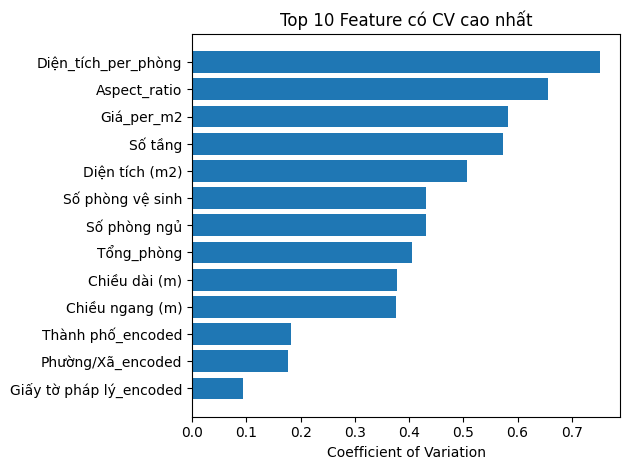

,Feature,CV
9,Diện_tích_per_phòng,0.751402
8,Aspect_ratio,0.656601
6,Giá_per_m2,0.582770
5,Số tầng,0.573169
0,Diện tích (m2),0.507055
4,Số phòng vệ sinh,0.431893
3,Số phòng ngủ,0.430697
7,Tổng_phòng,0.405088
2,Chiều dài (m),0.377269
1,Chiều ngang (m),0.375521


In [95]:
import matplotlib.pyplot as plt

# LOAD DATA
df = pd.read_csv("data_encoded.csv")

target_col = 'Giá (tỷ VNĐ)'

# LẤY FEATURE SỐ (TRỪ TARGET)
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols = [c for c in num_cols if c != target_col]

# TÍNH COEFFICIENT OF VARIATION (CV)
cv = {
    col: df[col].std() / abs(df[col].mean())
    for col in num_cols
    if df[col].mean() != 0
}

cv_df = (
    pd.DataFrame(cv.items(), columns=['Feature', 'CV'])
    .sort_values('CV', ascending=False)
)

# VISUALIZE TOP CV CAO NHẤT
top_cv = cv_df.head(20)

plt.figure()
plt.barh(top_cv['Feature'], top_cv['CV'])
plt.gca().invert_yaxis()
plt.xlabel('Coefficient of Variation')
plt.title('Top 10 Feature có CV cao nhất')
plt.tight_layout()
plt.show()

cv_df.head(20)


In [97]:
x = df.drop(columns=[target_col])
y = df[target_col]
x

,Diện tích (m2),Hướng,Chiều ngang (m),Chiều dài (m),Số phòng ngủ,Số phòng vệ sinh,Số tầng,Tình trạng nội thất,Giá_per_m2,Tổng_phòng,Aspect_ratio,Diện_tích_per_phòng,Thành phố_encoded,Phường/Xã_encoded,Loại hình_Nhà biệt thự,"Loại hình_Nhà mặt phố, mặt tiền","Loại hình_Nhà ngõ, hẻm",Loại hình_Nhà phố liền kề,Giấy tờ pháp lý_encoded
0,45.0,Không xác định,4.500000,10.000000,2.0,2.0,1.250000,Không xác định,0.024444,4,0.450000,11.250000,2.729001,3.657888,False,True,False,False,4
1,67.7,Không xác định,5.000000,13.500000,5.0,5.0,1.000000,Không xác định,0.097489,10,0.370370,6.770000,6.496365,5.841056,False,False,True,False,4
2,64.9,Đông Bắc,4.790000,12.000000,2.0,1.0,2.000000,Hoàn thiện cơ bản,0.055162,3,0.399167,21.633333,6.953316,5.525794,False,False,True,False,4
3,150.0,Đông Nam,5.000000,30.000000,1.0,1.0,8.333333,Nội thất đầy đủ,0.012000,2,0.166667,75.000000,3.684868,6.398009,False,False,True,False,4
4,43.0,Không xác định,4.500000,9.000000,4.0,4.0,1.000000,Không xác định,0.162791,8,0.500000,5.375000,6.460152,6.266364,False,False,True,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,100.0,Không xác định,5.000000,20.000000,3.0,2.0,1.851852,Không xác định,0.039500,5,0.250000,20.000000,4.071625,5.294449,False,False,True,False,4
5963,48.0,Không xác định,3.600000,13.300000,6.0,4.0,5.000000,Nội thất đầy đủ,0.375000,10,0.270677,4.800000,9.136857,8.606160,False,False,True,False,4
5964,44.0,Không xác định,4.000000,11.000000,5.0,5.0,5.000000,Không xác định,0.147727,10,0.363636,4.400000,6.482567,5.928128,False,False,True,False,4
5965,130.0,Không xác định,5.000000,26.000000,2.0,1.0,3.611111,Hoàn thiện cơ bản,0.008385,3,0.192308,43.333333,3.331486,6.398009,False,False,True,False,4


In [100]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

x_train.shape

(4773, 19)

In [101]:
y_train.shape

(4773,)

In [102]:
x_train['Giá'] = y_train
x_train.shape

(4773, 20)

In [103]:
x_test['Giá'] = y_test
x_test.shape

(1194, 20)

In [104]:
x_train.to_csv('train_data.csv', index=False)
x_test.to_csv('test_data.csv', index=False)